In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('..\data\dados_merge.zip',compression='zip',index_col=[0])

C:\Users\ednae\AppData\Local\Temp\ipykernel_9656\677301799.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('..\data\dados_merge.zip',compression='zip',index_col=[0])


In [3]:
df.drop(['Código UG_y',
'Nome UG_y',
'Código Modalidade Compra_y',
'Modalidade Compra_y','Código Órgão_y','Nome Órgão_y'
],axis=1,inplace=True)

In [4]:
df.head(1)

,Código UG_x,Nome UG_x,Código Modalidade Compra_x,Modalidade Compra_x,Número Processo,Código Órgão_x,Nome Órgão_x,Código Item Compra,Descrição,Quantidade Item,...,Código Órgão Superior,Nome Órgão Superior,Município,data,Data Abertura,Total,Obras,Tag,UF,valor_individual
0,257005,CENTRO NACIONAL DE PRIMATAS,5,Pregão,25208.001996/2020,36000,Ministério da Saúde - Unidades com vínculo di,2570050500016202000001,SACO PLÁSTICO LIXO,500,...,36000,Ministério da Saúde,ANANINDEUA,2022-02-23,10/02/2022,40385.44,Compras/Servicos,0,PA,2.28


### Itens que mais aparecem e suas stats

In [5]:
agrup = df.groupby(['Objeto','Descrição','UF','Nome Órgão Superior']).agg({'valor_individual':['count','min','max','mean','std']})
agrup = pd.DataFrame(agrup['valor_individual']).reset_index(drop=False)
agrup = agrup.sort_values(by='count',ascending=False)

range1 = agrup[(agrup['mean']!=0) & (agrup['count']>=10)]
range1.shape
range1 = range1.sort_values(by='count',ascending=False)
pd.options.display.max_colwidth = 500
pd.set_option('display.float_format', lambda x: '%.5f' % x)
range1[0:20]

,Objeto,Descrição,UF,Nome Órgão Superior,count,min,max,mean,std
85620,"Objeto: Pregão Eletrônico - Contratação de empresa(s) especializada(s) para realização de eventual de serviços comuns de engenharia, para manutenção predial (Registro de Preços), sem dedicação exclusiva de mão de obra, compreendendo: reforma, conservação ou reparação no âmbito Instituto Federal de Educação, Ciência e Tecnologia do Piauí, conforme condições, quantidades e exigências estabelecidas no edital e anexos.",MANUTENCAO / REFORMA PREDIAL,PI,Ministério da Educação,863,0.09000,11069.15000,326.43000,1003.03293
85204,"Objeto: Pregão Eletrônico - Contratação de empresa para execução de serviços de manutenção de motores de centro rabetas e de linhas de eixos, das marcas: Cummins, Volvo Penta e Scania, empregados nas Organizações Militares (OM) subordinadas ao Comando do 9º Distrito Naval (Com9ºDN)",MANUTENCAO INDUSTRIAL,AM,Ministério da Defesa,727,10.00000,41526.00000,2322.29860,3722.19324
1,Informação protegida por sigilo nos termos da legislação vigente,Informação protegida por sigilo nos termos da legislação vigente,AC,Ministério da Justiça e Segurança Pública,617,0.03773,2348000.00000,30841.47342,170189.65588
12217,Objeto: Pregão Eletrônico - Aquisic a o de bandeiras e insi gnias para a Subdiretoria de Abastecimento da Aerona utica (SDAB).,BANDEIRA EM GERAL,RJ,Ministério da Defesa,581,34.00000,1180.00000,118.00972,67.58990
113740,Objeto: Pregão Eletrônico - Registro de Preços para serviços de manutenção de Condicionador de ar e fornecimento de pecas para UFSM.,COMPRESSOR REFRIGERAÇÃO,RN,Ministério da Educação,543,80.00000,4500.00000,687.74401,854.85641
113741,Objeto: Pregão Eletrônico - Registro de Preços para serviços de manutenção de Condicionador de ar e fornecimento de pecas para UFSM.,COMPRESSOR REFRIGERAÇÃO,RS,Ministério da Educação,543,80.00000,4500.00000,687.74401,854.85641
82836,"Objeto: Pregão Eletrônico - Contratação de Empresa especializada em execução de eventuais serviços de engenharia, demolições, instalações, adaptação e manutenção de bens imóveis com fornecimento de peças, equipamentos, ferramentas, materiais e mão de obra",SERVICO ENGENHARIA,PB,Ministério da Educação,521,0.42000,20866.69000,214.50393,989.08203
98028,Objeto: Pregão Eletrônico - Futura e eventual contratação de empresa especializada na manutenção corretiva de equipamentos odontológicos da 1ª Brigada de Infantaria de Selva,MANUTENCAO EM EQUIPAMENTOS DE CONSULTORIO ODONTOLOGICO,RR,Ministério da Defesa,520,35.00000,625.00000,351.07308,161.22801
98027,Objeto: Pregão Eletrônico - Futura e eventual contratação de empresa especializada na manutenção corretiva de equipamentos odontológicos da 1ª Brigada de Infantaria de Selva,MANUTENCAO EM EQUIPAMENTOS DE CONSULTORIO ODONTOLOGICO,PB,Ministério da Defesa,520,35.00000,625.00000,351.07308,161.22801
73081,Objeto: Pregão Eletrônico - Aquisição de peças para manutenção de Viaturas Blindadas M-109 e M-992 me proveito do PqRMnt/3RM,EQUIPAMENTO DE OFICINA MECÂNICA,RS,Ministério da Defesa,502,1.50000,425992.35000,12392.59977,42944.19419


### C/filtros de serviços especialziados

In [6]:
agrup = df[df['Obras']=='Compras/Servicos'].groupby(['Descrição','UF']).agg({'valor_individual':['count','min','max','mean','std']})
agrup = pd.DataFrame(agrup['valor_individual']).reset_index(drop=False)
agrup = agrup.sort_values(by='count',ascending=False)

range1 = agrup[(agrup['mean']!=0) & (agrup['count']>=10)]
range1 = range1.sort_values(by='count',ascending=False)
range1[0:20]

,Descrição,UF,count,min,max,mean,std
30498,MANUTENCAO INDUSTRIAL,AM,945,10.00000,41526.00000,2695.45123,3773.21076
27089,Informação protegida por sigilo nos termos da legislação vigente,AC,757,0.03773,2800000.00000,31858.96879,185320.81242
5066,BANDEIRA EM GERAL,RJ,677,34.00000,3689.00000,134.47386,157.03308
36665,PEÇA MECÂNICA/ELÉTRICA - VEÍCULO AUTOMOTIVO,RS,631,0.50000,26600.00000,1025.12211,2313.98560
14223,CONEXÃO HIDRÁULICA,MG,602,0.36000,123.01000,8.17822,12.76419
30435,MANUTENCAO EM EQUIPAMENTOS DE CONSULTORIO ODONTOLOGICO,PB,601,19.00000,2490.00000,314.38935,202.58348
30439,MANUTENCAO EM EQUIPAMENTOS DE CONSULTORIO ODONTOLOGICO,RR,600,19.00000,625.00000,310.76333,182.19067
43994,SISTEMA FIXAÇÃO COLUNA VERTEBRAL VIA POSTERIOR,RJ,600,210.00000,33268.73000,4820.08738,5691.70653
25815,HOMOGENEIZADOR,MG,572,5.00000,80000.00000,1630.58886,5062.87400
13759,COMPRESSOR REFRIGERAÇÃO,RN,548,80.00000,5457.17000,701.42432,879.54419


In [7]:
#from src.remove_itens import define_obra
#aa = define_obra(df)

In [8]:
from remove_itens import define_obra
df['new_filter'] = define_obra(df)

In [9]:
df_filter1 = df[df['new_filter']=='-']

In [10]:
agrup = df_filter1.groupby(['Objeto','Descrição','UF','Nome Órgão Superior','data']).agg({'valor_individual':['count','min','max','mean','std']})
agrup = pd.DataFrame(agrup['valor_individual']).reset_index(drop=False)
agrup = agrup.sort_values(by='count',ascending=False)

range1 = agrup[(agrup['mean']!=0)]
range1 = range1.sort_values(by='count',ascending=False)
range1.head()

,Objeto,Descrição,UF,Nome Órgão Superior,data,count,min,max,mean,std
12243,Objeto: Pregão Eletrônico - Aquisic a o de bandeiras e insi gnias para a Subdiretoria de Abastecimento da Aerona utica (SDAB).,BANDEIRA EM GERAL,RJ,Ministério da Defesa,2022-02-14,581,34.00000,1180.00000,118.00972,67.58990
113193,Objeto: Pregão Eletrônico - Registro de Preços para serviços de manutenção de Condicionador de ar e fornecimento de pecas para UFSM.,COMPRESSOR REFRIGERAÇÃO,RN,Ministério da Educação,2022-04-04,543,80.00000,4500.00000,687.74401,854.85641
113194,Objeto: Pregão Eletrônico - Registro de Preços para serviços de manutenção de Condicionador de ar e fornecimento de pecas para UFSM.,COMPRESSOR REFRIGERAÇÃO,RS,Ministério da Educação,2022-04-04,543,80.00000,4500.00000,687.74401,854.85641
83247,"Objeto: Pregão Eletrônico - Contratação de Empresa especializada em execução de eventuais serviços de engenharia, demolições, instalações, adaptação e manutenção de bens imóveis com fornecimento de peças, equipamentos, ferramentas, materiais e mão de obra",SERVICO ENGENHARIA,PB,Ministério da Educação,2022-04-02,521,0.42000,20866.69000,214.50393,989.08203
73542,Objeto: Pregão Eletrônico - Aquisição de peças para manutenção de Viaturas Blindadas M-109 e M-992 me proveito do PqRMnt/3RM,EQUIPAMENTO DE OFICINA MECÂNICA,RN,Ministério da Defesa,2021-12-14,502,1.50000,425992.35000,12392.59977,42944.19419


### Por objeto

In [11]:
from remove_itens import remove_from_objeto
df['new_filter2'] = remove_from_objeto(df)
df_filter2 = df[df['new_filter2']=='-']

In [12]:
print(df_filter1.shape)
print(df_filter2.shape)

(300286, 26)
(277901, 27)


In [13]:
agrup2 = df_filter2.groupby(['Objeto','Descrição','UF','Nome Órgão Superior','data']).agg({'valor_individual':['count','min','max','mean','std']})
agrup2 = pd.DataFrame(agrup2['valor_individual']).reset_index(drop=False)
agrup2 = agrup2.sort_values(by='count',ascending=False)

#range2 = agrup2[(agrup2['mean']!=0) & (agrup2['count']>=10)]
#range2 = range2.sort_values(by='count',ascending=False)

In [14]:
top5 = df_filter2.Descrição.value_counts().head(2).index
top5_2 = df_filter2.Objeto.value_counts().head(2).index

### BLOXPLOT DE CADA ITEM

In [15]:
extrato = df_filter2.loc[df_filter2['Descrição'].isin(top5)]
extrato2 = df_filter2.loc[df_filter2['Objeto'].isin(top5_2)]

In [16]:
extrato11 = extrato[['Código UG_x','Código Modalidade Compra_x','Código Órgão_x','Descrição',
'Quantidade Item','Código Vencedor','Código Órgão Superior','Município','data','Total','valor_individual','UF']]

extrato22 = extrato2[['Código UG_x','Código Modalidade Compra_x','Código Órgão_x','Descrição',
'Quantidade Item','Código Vencedor','Código Órgão Superior','Município','data','Total','valor_individual','UF']]

In [17]:
print(df.shape, 'dados gerais')
print(agrup.shape,'dados filtrados')
print(extrato11.shape, 'recorte dos 20 mais frequentes')
print(extrato22.shape, 'colunas filtradas dos 20 mais frequentes')

(323176, 27) dados gerais
(126626, 10) dados filtrados
(6285, 12) recorte dos 20 mais frequentes
(3500, 12) colunas filtradas dos 20 mais frequentes


In [18]:
#agrup.to_csv('dados_no_services.csv')
#extrato2.to_csv('top_20.csv')

In [19]:
#range1.to_csv('descricoes_agrup.csv')
#range2.to_csv('objetos_agrup.csv')

In [20]:
teste1 = df_filter2[df_filter2['Descrição'].isin(top5)]

In [21]:
import plotly.express as px

fig = px.box(teste1,x='UF',y='valor_individual',hover_name='Descrição')
fig.show()

<AxesSubplot:xlabel='Descrição', ylabel='valor_individual'>

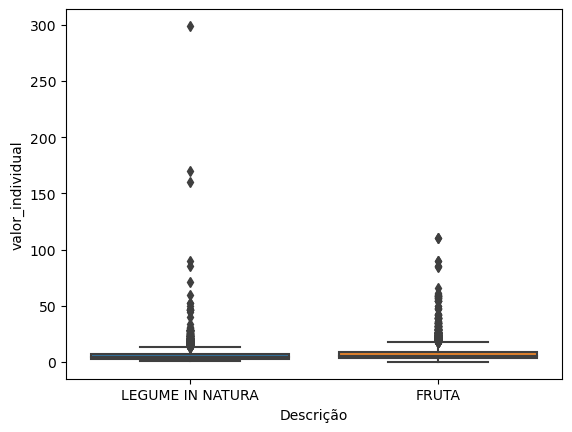

In [65]:
import seaborn as sns

#figg = sns.displot(teste1, x="valor_individual",hue='Descrição',alpha=0.7,kind='kde')
sns.boxplot(teste1,y='valor_individual',x='Descrição')